In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'SimSun'
data = pd.read_csv('../newData.csv',encoding='gbk')

# 提取特征和目标变量
features = data[['月份', '日期', '星期几', '季节', '节假日']]
target = data['航线金额']

#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

best_params = {
    'n_estimators': 140,
    'max_depth': 13,
}

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(**best_params,random_state=42)

# 拟合模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印结果
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)

MSE: 90877385946.16803
RMSE: 301458.76325986616
MAE: 250880.21282974596
R^2: -0.6089560120237401


D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


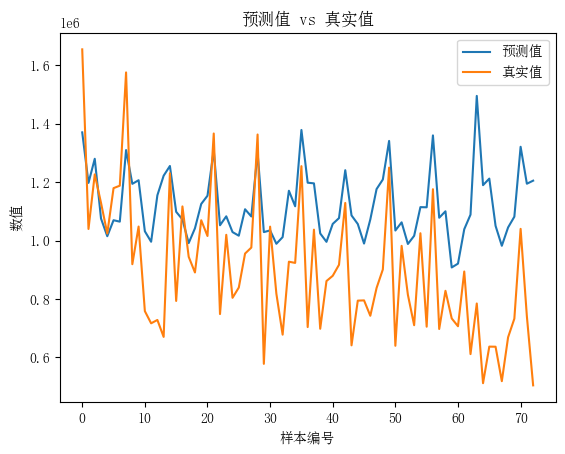

In [2]:
# 生成 x 轴坐标
x = np.arange(len(y_pred))

# 绘制预测值折线
plt.plot(x, y_pred, label='预测值')
# 绘制真实值折线
plt.plot(x, y_test, label='真实值')

# 设置轴标签
plt.xlabel('样本编号')
plt.ylabel('数值')
# 设置图例
plt.legend()
# 设置图标题
plt.title('预测值 vs 真实值')

# 显示图形
plt.show()